In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Daily Bike Sharing.csv to Daily Bike Sharing.csv


In [3]:
dc = pd.read_csv("/content/Daily Bike Sharing.csv")
dc.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
#get the data
data = pd.read_csv("Daily Bike Sharing.csv",
                   index_col = "dteday",
                   parse_dates = True)
data.head(5)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
#select variables
data_BS = data.loc[:, ["cnt", "holiday", "workingday", "weathersit",
                       "temp", "atemp", "hum", "windspeed"]]
data_BS.head(5)

,cnt,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446
2011-01-02,801,0,0,2,0.363478,0.353739,0.696087,0.248539
2011-01-03,1349,0,1,1,0.196364,0.189405,0.437273,0.248309
2011-01-04,1562,0,1,1,0.200000,0.212122,0.590435,0.160296
2011-01-05,1600,0,1,1,0.226957,0.229270,0.436957,0.186900


In [7]:
#renaming variable
data_BS = data_BS.rename(columns = {'cnt' : 'y'})
data_BS.head(5)

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446
2011-01-02,801,0,0,2,0.363478,0.353739,0.696087,0.248539
2011-01-03,1349,0,1,1,0.196364,0.189405,0.437273,0.248309
2011-01-04,1562,0,1,1,0.200000,0.212122,0.590435,0.160296
2011-01-05,1600,0,1,1,0.226957,0.229270,0.436957,0.186900


In [8]:
data_BS = data_BS.asfreq("D")
data_BS.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq='D')

<Axes: xlabel='dteday'>

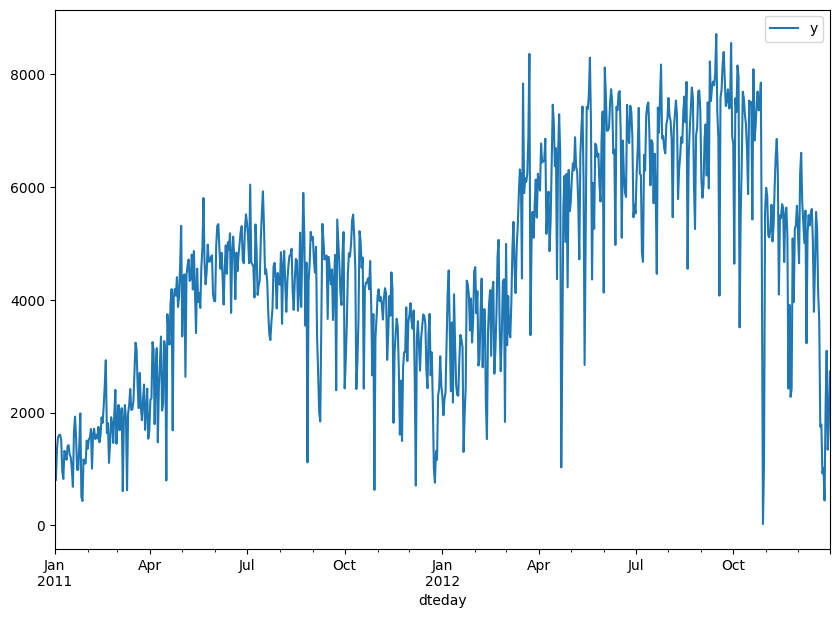

In [9]:
data_BS["y"].plot(figsize = (10, 7), legend = True)

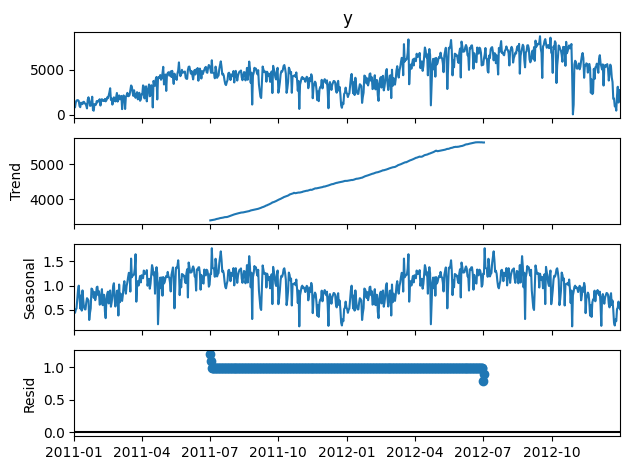

In [10]:
#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_BS['y'],
                                   model = 'multiplicative',
                                    period = 365)
decomposition.plot();

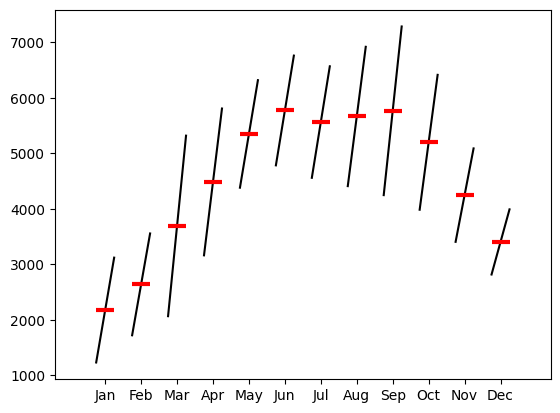

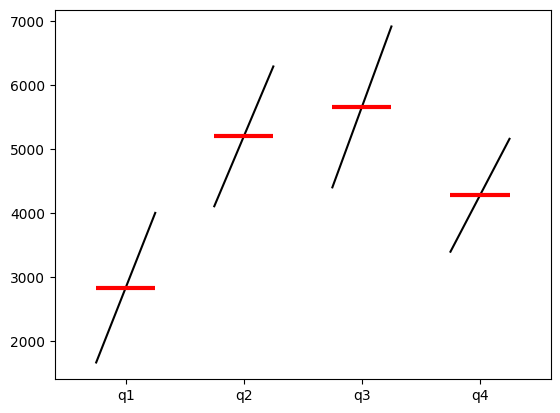

In [11]:
#seasonality graphs
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
month_plot(data_BS['y'].resample(rule = 'MS').mean())
quarter_plot(data_BS['y'].resample(rule = 'Q').mean());

#Training and test set

In [12]:

test_days = 31
train = data_BS.iloc[:-test_days, :]
test = data_BS.iloc[-test_days:, :]
test.tail(5)

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2012-12-27,2114,0,1,2,0.254167,0.226642,0.652917,0.350133
2012-12-28,3095,0,1,2,0.253333,0.255046,0.590000,0.155471
2012-12-29,1341,0,0,2,0.253333,0.242400,0.752917,0.124383
2012-12-30,1796,0,0,1,0.255833,0.231700,0.483333,0.350754
2012-12-31,2729,0,1,2,0.215833,0.223487,0.577500,0.154846


#Forecasting Model

In [13]:
#libraries
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [14]:
model = ExponentialSmoothing(endog = train.y,
                             trend = 'mul',
                             seasonal = 'mul',
                             seasonal_periods = 7).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [15]:
predictions_X = model.forecast(steps = len(test)).rename("X")
predictions_X.head()

2012-12-01    4676.804684
2012-12-02    4153.246795
2012-12-03    4322.003783
2012-12-04    4279.673415
2012-12-05    4825.991667
Freq: D, Name: X, dtype: float64

<Axes: xlabel='dteday'>

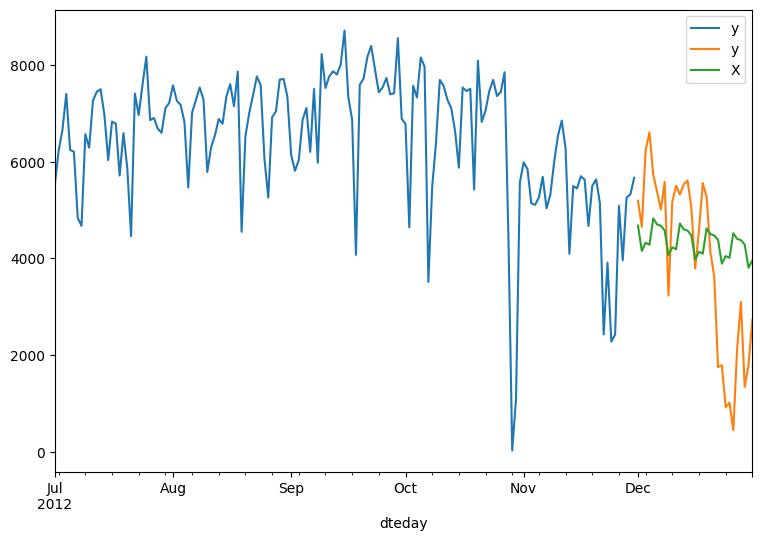

In [16]:
#visualization
train['y']['2012-07-01':].plot(figsize = (9,6), legend = True)
test['y'].plot(legend = True)
predictions_X.plot(legend = True)

In [17]:
#MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(test['y'], predictions_X),0))
print(round(np.sqrt(mean_squared_error(test['y'], predictions_X)), 0))

1389.0
1698.0


In [18]:
#MAPE function
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(test['y'], predictions_X)

87.26099293841784

In [19]:
%cd /content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/Model_Assess_Result

[Errno 2] No such file or directory: '/content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/Model_Assess_Result'
/content


In [20]:
#predictions_X.to_csv('predictions_hw.csv', index = True)

#Using TbatsModel

In [21]:
!pip install tbats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.0 MB/s eta 0:00:00


In [22]:
from tbats import TBATS

In [23]:
#tbats model
model = TBATS(seasonal_periods = [7, 365.5])
model = model.fit(train['y'])

In [24]:
predictions_tbats = pd.Series(model.forecast(steps = len(test))).rename("TBATS")
predictions_tbats.index = test.index
predictions_tbats.head()

dteday
2012-12-01    4880.266911
2012-12-02    4484.716439
2012-12-03    4434.522384
2012-12-04    4513.433995
2012-12-05    4650.709377
Freq: D, Name: TBATS, dtype: float64

<Axes: xlabel='dteday'>

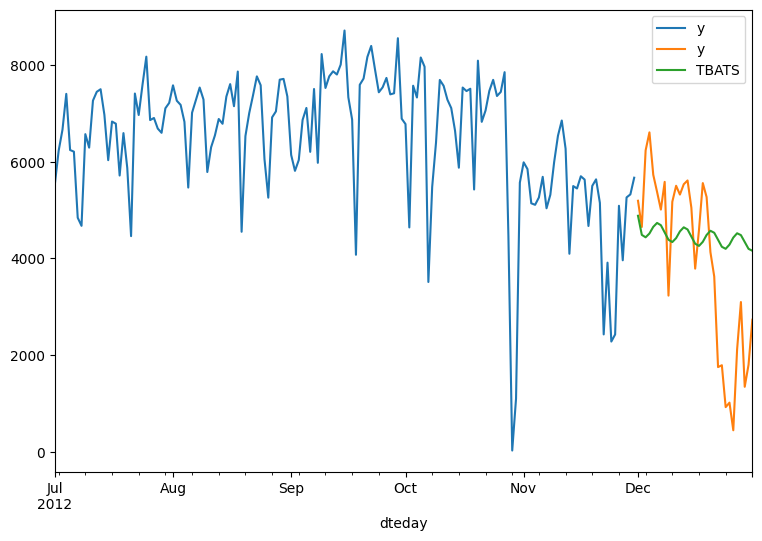

In [25]:
train['y']['2012-07-01':].plot(figsize = (9,6), legend = True)
test['y'].plot(legend = True)
predictions_tbats.plot(legend = True)

In [26]:
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(test['y'], predictions_tbats)

90.00295892946428

In [27]:
#predictions_X.to_csv('predictions_tbats.csv', index = True)

#Using Sarimax Model

In [28]:
#Stationarity
from statsmodels.tsa.stattools import adfuller
stationarity = adfuller(data_BS['y'])
print('Augmented Dickey Fuller p-value: %F' % stationarity[1])

Augmented Dickey Fuller p-value: 0.342743


In [29]:
#Training and test set
test_days = 31
training_set = data_BS.iloc[:-test_days, :]
test_set = data_BS.iloc[-test_days:, :]
test_set.tail(1)

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2012-12-31,2729,0,1,2,0.215833,0.223487,0.5775,0.154846


In [30]:
#exogenous variables
train_exog = training_set.iloc[:,1:]
test_exog = test_set.iloc[:,1:]
test_exog.head()

,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,
2012-12-01,0,0,2,0.298333,0.316904,0.806667,0.059704
2012-12-02,0,0,2,0.347500,0.359208,0.823333,0.124379
2012-12-03,0,1,1,0.452500,0.455796,0.767500,0.082721
2012-12-04,0,1,1,0.475833,0.469054,0.733750,0.174129
2012-12-05,0,1,1,0.438333,0.428012,0.485000,0.324021


In [31]:
from pmdarima import auto_arima


#forecasting model


In [32]:
model = auto_arima(y = training_set['y'],
                   X = train_exog,
                   m = 7,
                   seasonal = True,
                   stepwise = False)

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  700
Model:               SARIMAX(0, 1, 3)   Log Likelihood               -5596.921
Date:                Thu, 14 Sep 2023   AIC                          11217.842
Time:                        16:29:00   BIC                          11272.438
Sample:                    01-01-2011   HQIC                         11238.948
                         - 11-30-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.3363      5.562      0.780      0.436      -6.566      15.238
holiday     -240.2429    129.114     -1.861      0.063    -493.301      12.815
workingday    89.1769     60.525      1.473      0.141     -29.450     207.804
weathersit  -460.2189     51.306     -8.970      0.000    -560.776    -359.662
temp        3421.6063   1170.580      2.923      0.003    1127.312    5715.900
atemp       1970.5757   1197.166      1.646      0.100    -375.827    4316.978
hum        -2280.4183    198.526    -11.487      0.000   -2669.522   -1891.315
windspeed  -2275.5667    373.391     -6.094      0.000   -3007.399   -1543.734
ma.L1         -0.5546      0.028    -19.642      0.000      -0.610      -0.499
ma.L2         -0.1348      0.039     -3.422      0.001      -0.212      -0.058
ma.L3         -0.1443      0.040     -3.607      0.000      -0.223      -0.066
sigma2      5.263e+05   2.02e+04     26.106      0.000    4.87e+05    5.66e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               623.72
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.51   Skew:                            -0.92
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
#predicting_Sarimax_Model
predictions_sarimax = pd.Series(model.predict(n_periods= test_days,
                              X = test_exog)).rename("SARIMAX")
predictions_sarimax.index = test_set.index
predictions_sarimax

dteday
2012-12-01    4288.793634
2012-12-02    4216.809763
2012-12-03    5448.119336
2012-12-04    5427.376509
2012-12-05    5448.690983
2012-12-06    4779.471672
2012-12-07    4189.643317
2012-12-08    4177.148691
2012-12-09    4075.809920
2012-12-10    4317.391732
2012-12-11    4356.025063
2012-12-12    4524.383774
2012-12-13    5071.281646
2012-12-14    4766.559922
2012-12-15    4953.729999
2012-12-16    4274.472687
2012-12-17    4385.503534
2012-12-18    5195.085035
2012-12-19    4976.314384
2012-12-20    4518.759547
2012-12-21    4148.967292
2012-12-22    4375.008966
2012-12-23    4811.913793
2012-12-24    3892.328878
2012-12-25    3763.312487
2012-12-26    2788.323712
2012-12-27    3614.571243
2012-12-28    4258.469574
2012-12-29    3847.933000
2012-12-30    4399.599012
2012-12-31    4110.906233
Freq: D, Name: SARIMAX, dtype: float64

<Axes: xlabel='dteday'>

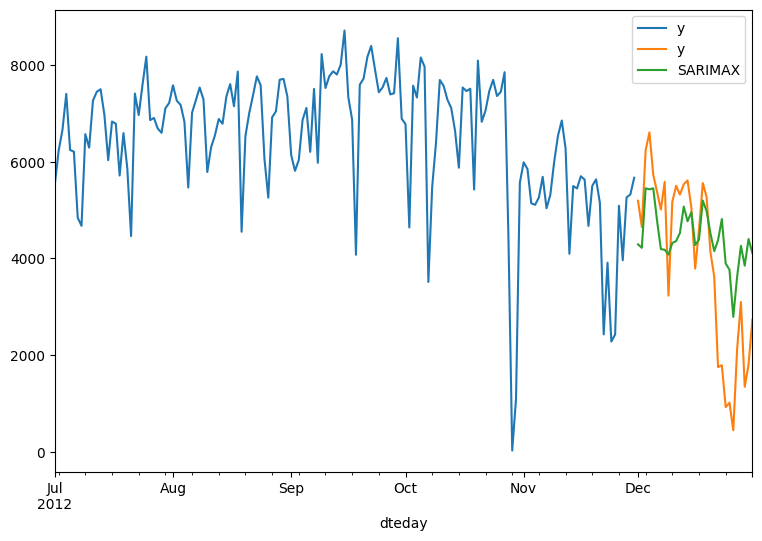

In [35]:
#visualization
training_set['y']['2012-07-01':].plot(figsize = (9,6), legend = True)
test_set['y'].plot(legend = True)
predictions_sarimax.plot(legend = True)

In [36]:
#MAPE function
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(test_set['y'], predictions_sarimax)

71.2581748544236

In [37]:
#predictions_sarimax.to_csv('predictions_sarimax.csv', index = True)

#Using Tenserflow

In [38]:
import tensorflow_probability as tfp

In [39]:
#Isolate the regressors
exog = np.asmatrix(data_BS.iloc[:,1:].astype(np.float64))
exog[:1]

matrix([[0.      , 0.      , 2.      , 0.344167, 0.363625, 0.805833,
         0.160446]])

In [40]:
#linear regression
regressors = tfp.sts.LinearRegression(design_matrix = exog,
                                      name = "regressors")

In [41]:
y = train['y'].astype(np.float64)
y[:5]

dteday
2011-01-01     985.0
2011-01-02     801.0
2011-01-03    1349.0
2011-01-04    1562.0
2011-01-05    1600.0
Freq: D, Name: y, dtype: float64

In [42]:
#Weekday seasonality
weekday_effect = tfp.sts.Seasonal(num_seasons = 7,
                                  num_steps_per_season = 1,
                                  observed_time_series = y,
                                  name = "weekday_effect")

In [43]:
#number of days per month
num_days_per_month = np.array(
    [[31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31], #2011
     [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]]) # 2012

In [44]:
#Monthly seasonality
monthly_effect = tfp.sts.Seasonal(num_seasons = 12,
                                  num_steps_per_season = num_days_per_month,
                                  observed_time_series = y,
                                  name = "monthly_effect")

In [45]:
trend = tfp.sts.LocalLinearTrend(observed_time_series=y,
                                 name = "trend")

In [46]:
#Autoregressive
autoregressive = tfp.sts.Autoregressive(order = 1,
                                        observed_time_series = y,
                                        name = "autoregressive")

In [47]:
#forecasting model
model = tfp.sts.Sum([regressors,
                     weekday_effect,
                     monthly_effect,
                     autoregressive,
                     trend],
                    observed_time_series = y)

In [48]:
#fit with HMC
samples, kernel_results = tfp.sts.fit_with_hmc(model = model,
                                               observed_time_series = y,
                                               num_results = 100,
                                               num_warmup_steps = 50,
                                               num_leapfrog_steps = 15,
                                               num_variational_steps = 150,
                                               seed = 1502)

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.while_loop(c, b, vars, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.while_loop(c, b, vars))
/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/mcmc/sample.py:339: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '


In [49]:
#forecast
forecast = tfp.sts.forecast(model = model,
                            observed_time_series = y,
                            parameter_samples = samples,
                            num_steps_forecast = len(test_set))

In [50]:
predictions_tfp = pd.Series(forecast.mean()[:,0], name = "TFP")
predictions_tfp.index = test.index
predictions_tfp[:2]

dteday
2012-12-01    4242.145909
2012-12-02    3470.909457
Freq: D, Name: TFP, dtype: float64

<Axes: xlabel='dteday'>

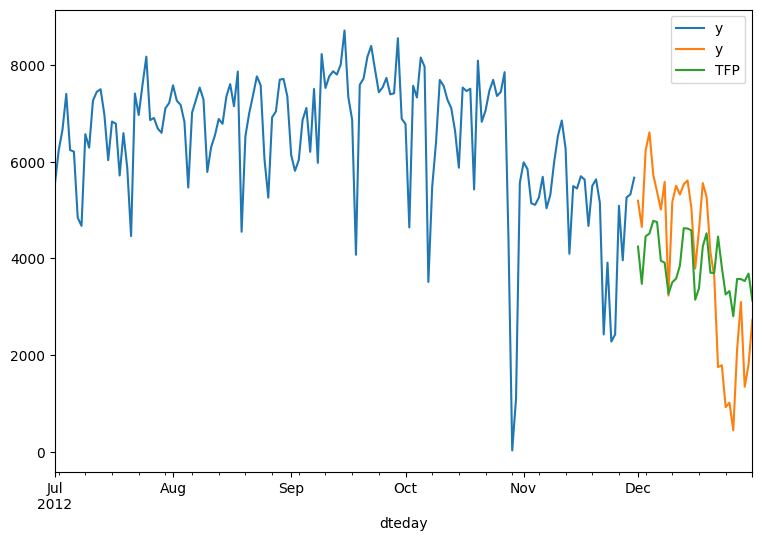

In [51]:
#visualization
training_set['y']['2012-07-01':].plot(figsize = (9,6), legend = True)
test_set['y'].plot(legend = True)
predictions_tfp.plot(legend = True)

In [52]:
#MAPE function
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(test_set['y'], predictions_tfp)

66.70698846112886

In [53]:
#predictions_tfp.to_csv('predictions_tfp.csv', index = True)

#Using Fbprophet

In [54]:
data_BS = pd.read_csv("/content/Daily Bike Sharing.csv")
data_BS.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [55]:
#select variables
dataset = data_BS.loc[:, ["dteday","cnt", "holiday", "workingday", "weathersit",
                       "temp", "atemp", "hum", "windspeed"]]
dataset.head(1)

,dteday,cnt,holiday,workingday,weathersit,temp,atemp,hum,windspeed
0,2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446


In [56]:
dataset.dteday = pd.to_datetime(dataset.dteday,
                                format = "%Y-%m-%d")
dataset.dteday

0     2011-01-01
1     2011-01-02
2     2011-01-03
3     2011-01-04
4     2011-01-05
         ...    
726   2012-12-27
727   2012-12-28
728   2012-12-29
729   2012-12-30
730   2012-12-31
Name: dteday, Length: 731, dtype: datetime64[ns]

In [57]:
dataset = dataset.rename(columns = {'cnt' : 'y'})
dataset = dataset.rename(columns = {'dteday' : 'ds'})


In [58]:
dataset.head()

,ds,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
0,2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446
1,2011-01-02,801,0,0,2,0.363478,0.353739,0.696087,0.248539
2,2011-01-03,1349,0,1,1,0.196364,0.189405,0.437273,0.248309
3,2011-01-04,1562,0,1,1,0.200000,0.212122,0.590435,0.160296
4,2011-01-05,1600,0,1,1,0.226957,0.229270,0.436957,0.186900


In [59]:
import itertools
from prophet import Prophet

In [60]:
holiday_dates = dataset[dataset.holiday == 1].ds
holidays = pd.DataFrame({'holiday' : 'holi',
                         'ds': pd.to_datetime(holiday_dates),
                         'lower_window': -3,
                         'upper_window': 1})
holidays.head()

,holiday,ds,lower_window,upper_window
16,holi,2011-01-17,-3,1
51,holi,2011-02-21,-3,1
104,holi,2011-04-15,-3,1
149,holi,2011-05-30,-3,1
184,holi,2011-07-04,-3,1


In [61]:
#removing holiday column
dataset = dataset.drop(columns = "holiday")
dataset.head()

,ds,y,workingday,weathersit,temp,atemp,hum,windspeed
0,2011-01-01,985,0,2,0.344167,0.363625,0.805833,0.160446
1,2011-01-02,801,0,2,0.363478,0.353739,0.696087,0.248539
2,2011-01-03,1349,1,1,0.196364,0.189405,0.437273,0.248309
3,2011-01-04,1562,1,1,0.200000,0.212122,0.590435,0.160296
4,2011-01-05,1600,1,1,0.226957,0.229270,0.436957,0.186900


In [62]:
#Training and test set
test_days = 31
training_set = dataset.iloc[:-test_days, :]
test_set = dataset.iloc[-test_days:, :]
test_set.tail(5)

,ds,y,workingday,weathersit,temp,atemp,hum,windspeed
726,2012-12-27,2114,1,2,0.254167,0.226642,0.652917,0.350133
727,2012-12-28,3095,1,2,0.253333,0.255046,0.590000,0.155471
728,2012-12-29,1341,0,2,0.253333,0.242400,0.752917,0.124383
729,2012-12-30,1796,0,1,0.255833,0.231700,0.483333,0.350754
730,2012-12-31,2729,1,2,0.215833,0.223487,0.577500,0.154846


In [63]:
#import fbprophet

from google.colab import data_table
data_table.DataTable(training_set)


,ds,y,workingday,weathersit,temp,atemp,hum,windspeed
0,2011-01-01,985,0,2,0.344167,0.363625,0.805833,0.160446
1,2011-01-02,801,0,2,0.363478,0.353739,0.696087,0.248539
2,2011-01-03,1349,1,1,0.196364,0.189405,0.437273,0.248309
3,2011-01-04,1562,1,1,0.200000,0.212122,0.590435,0.160296
4,2011-01-05,1600,1,1,0.226957,0.229270,0.436957,0.186900
...,...,...,...,...,...,...,...,...
695,2012-11-26,5087,1,1,0.313333,0.339004,0.535417,0.046650
696,2012-11-27,3959,1,2,0.291667,0.281558,0.786667,0.237562
697,2012-11-28,5260,1,1,0.296667,0.289762,0.506250,0.210821
698,2012-11-29,5323,1,1,0.280870,0.298422,0.555652,0.115522


In [64]:
m = Prophet(growth = "linear",
            yearly_seasonality = True,
            weekly_seasonality = True,
            daily_seasonality = False,
            holidays = holidays,
            seasonality_mode = "multiplicative",
            seasonality_prior_scale = 10,
            holidays_prior_scale = 10,
            changepoint_prior_scale = 0.05)
m.add_regressor('workingday')
m.add_regressor('weathersit')
m.add_regressor('temp')
m.add_regressor('atemp')
m.add_regressor('hum')
m.add_regressor('windspeed')
m.fit(training_set)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpwi6ey1a7/76mol0g0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwi6ey1a7/emuy4fvl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69900', 'data', 'file=/tmp/tmpwi6ey1a7/76mol0g0.json', 'init=/tmp/tmpwi6ey1a7/emuy4fvl.json', 'output', 'file=/tmp/tmpwi6ey1a7/prophet_modelc9q5qxim/prophet_model-20230914165815.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:58:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:58:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [65]:
#future Dataframe


In [66]:
#Create Future Dataframe
future = m.make_future_dataframe(periods = len(test_set),
                                 freq = "D")
future.tail(1)

,ds
730,2012-12-31


In [67]:
#merge regressors
future = pd.concat([future, dataset.iloc[:,2:]],
                   axis = 1)
future.tail()

,ds,workingday,weathersit,temp,atemp,hum,windspeed
726,2012-12-27,1,2,0.254167,0.226642,0.652917,0.350133
727,2012-12-28,1,2,0.253333,0.255046,0.590000,0.155471
728,2012-12-29,0,2,0.253333,0.242400,0.752917,0.124383
729,2012-12-30,0,1,0.255833,0.231700,0.483333,0.350754
730,2012-12-31,1,2,0.215833,0.223487,0.577500,0.154846


In [68]:
#forecast
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,atemp,atemp_lower,atemp_upper,extra_regressors_multiplicative,...,workingday,workingday_lower,workingday_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2011-01-01,1741.780462,55.464662,1954.153648,1741.780462,1741.780462,-0.042646,-0.042646,-0.042646,-0.305879,...,0.000000,0.000000,0.000000,-0.268914,-0.268914,-0.268914,0.0,0.0,0.0,994.491544
1,2011-01-02,1751.144060,-70.851363,1744.957419,1751.144060,1751.144060,-0.046235,-0.046235,-0.046235,-0.311239,...,0.000000,0.000000,0.000000,-0.261177,-0.261177,-0.261177,0.0,0.0,0.0,816.652613
2,2011-01-03,1760.507658,183.173639,1963.293763,1760.507658,1760.507658,-0.105901,-0.105901,-0.105901,-0.085297,...,0.151616,0.151616,0.151616,-0.252120,-0.252120,-0.252120,0.0,0.0,0.0,1057.335664
3,2011-01-04,1769.871256,240.817790,2001.314906,1769.871256,1769.871256,-0.097653,-0.097653,-0.097653,-0.077240,...,0.151616,0.151616,0.151616,-0.241865,-0.241865,-0.241865,0.0,0.0,0.0,1146.470819
4,2011-01-05,1779.234855,348.937600,2198.619411,1779.234855,1779.234855,-0.091427,-0.091427,-0.091427,-0.003602,...,0.151616,0.151616,0.151616,-0.230555,-0.230555,-0.230555,0.0,0.0,0.0,1291.357034


In [69]:
#predictions
predictions_prophet = forecast.yhat[-test_days:].rename("prophet")
predictions_prophet[:5]

700    4178.525279
701    3529.017539
702    5723.768372
703    5726.739042
704    5427.955226
Name: prophet, dtype: float64

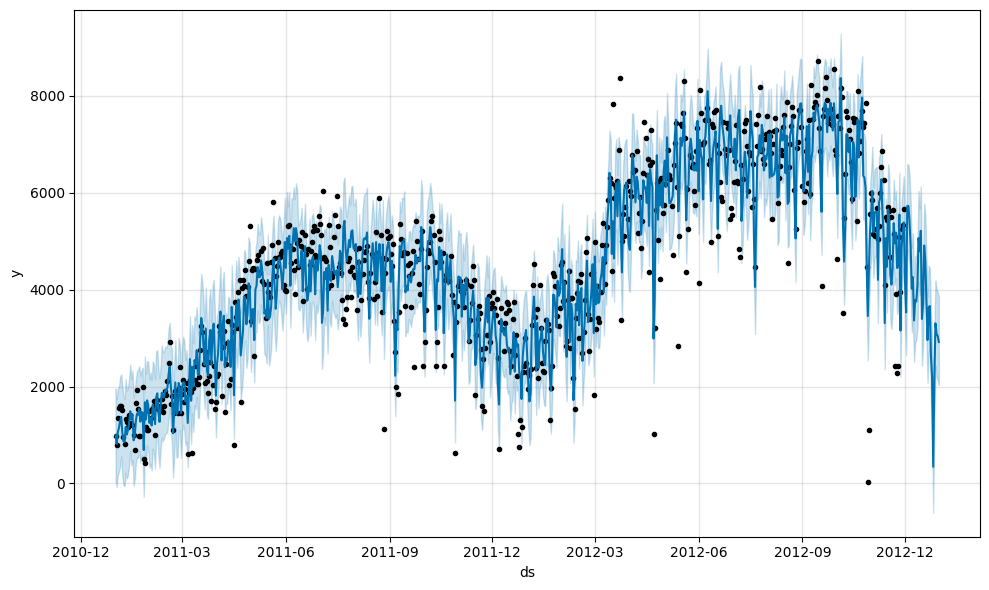

In [70]:
#visualization forecast
m.plot(forecast);

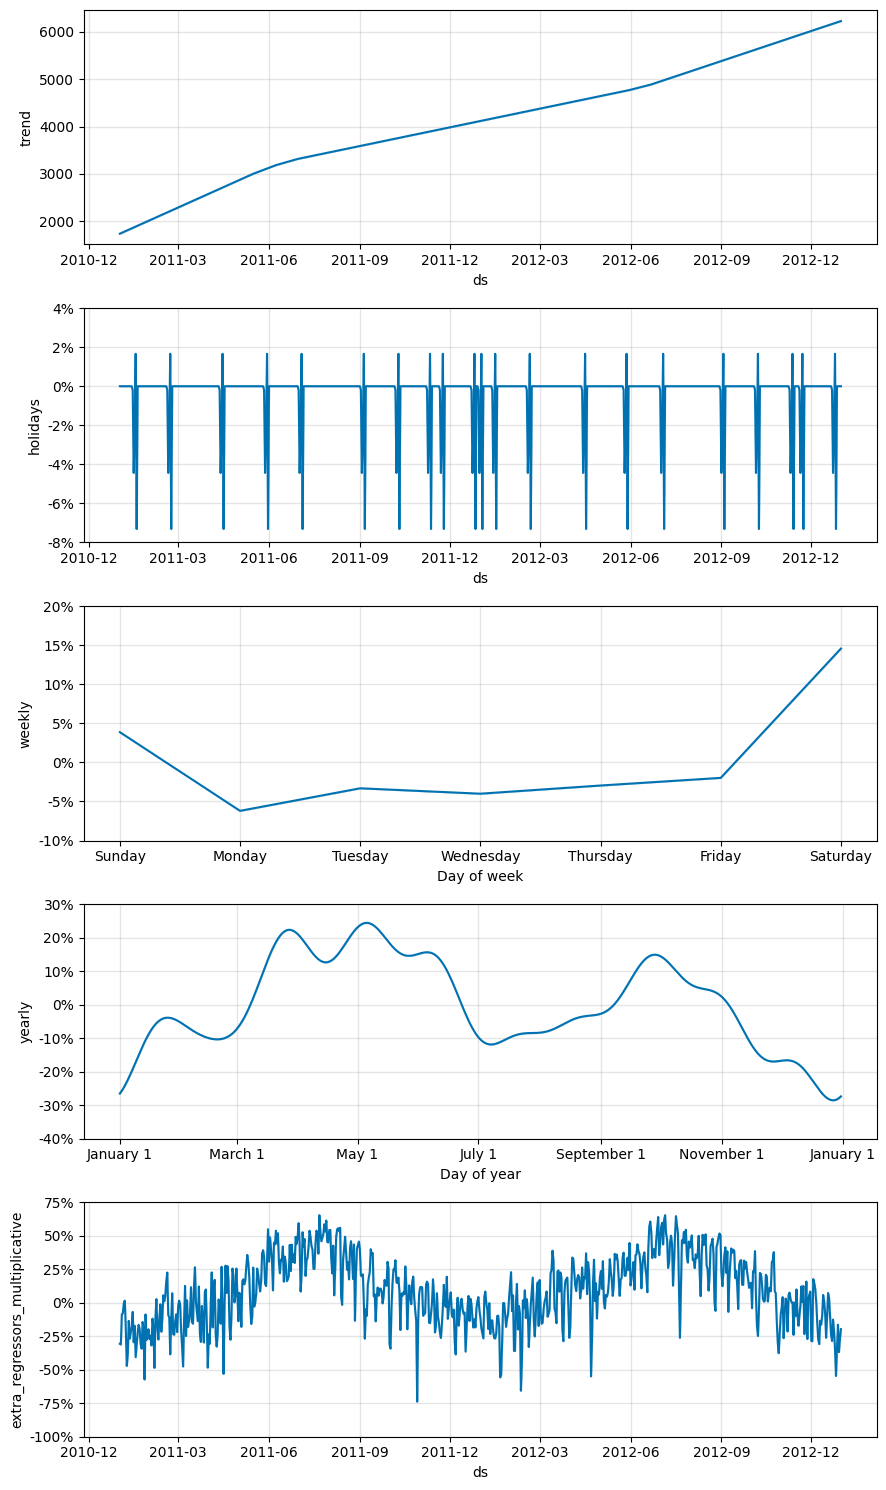

In [71]:
#plot components
m.plot_components(forecast);

In [72]:
#MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(test_set['y'], predictions_prophet),0))
print(round(np.sqrt(mean_squared_error(test_set['y'], predictions_prophet)), 0))

849.0
1020.0


In [73]:
#MAPE function
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(test_set['y'], predictions_prophet)

34.42484513551587

In [74]:
#MAPE function
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(test_set['y'], predictions_prophet)

34.42484513551587

#Cross Validation

In [75]:
#CV
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m,
                         horizon = '31 days',
                         initial = '540 days',
                         parallel = "processes")
df_cv.head()

INFO:prophet:Making 9 forecasts with cutoffs between 2012-06-28 00:00:00 and 2012-10-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79238b656200>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwi6ey1a7/7u6jinqb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwi6ey1a7/zyel5txn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwi6ey1a7/di231v7y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52345', 'data', 'file=/tmp/tmpwi6ey1a7/zyel5txn.json', 'init=/tmp/tmpwi6ey1a7/di231v7y.json', 'output', 'file=/tmp/tmpwi6ey1a7/prophet_modelghxnrg1j/prophet_model-20230914165818.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:58:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwi6ey1a7/zpev3og4.json
DEB

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-06-29,8172.173875,7386.832428,8961.982923,5463,2012-06-28
1,2012-06-30,7232.110573,6515.285346,8018.825197,5687,2012-06-28
2,2012-07-01,7440.981994,6706.660399,8172.674859,5531,2012-06-28
3,2012-07-02,6784.587466,6037.135593,7530.897518,6227,2012-06-28
4,2012-07-03,7442.934279,6748.589097,8182.912097,6660,2012-06-28


In [76]:
#MAE and RMSE
print(round(mean_absolute_error(df_cv['y'], df_cv['yhat']),0))
print(round(np.sqrt(mean_squared_error(df_cv['y'], df_cv['yhat'])), 0))
print(MAPE(df_cv['y'], df_cv['yhat']))

1012.0
1272.0
125.06347039134099


#Hyperparameter

In [77]:
#Parameter grid
from sklearn.model_selection import ParameterGrid
param_grid = {'seasonality_prior_scale': [5, 10, 20],
              'changepoint_prior_scale': [0.01, 0.05, 0.1],
              'holidays_prior_scale': [5, 10, 20]}
grid = ParameterGrid(param_grid)
list(grid)[:3]

[{'changepoint_prior_scale': 0.01,
  'holidays_prior_scale': 5,
  'seasonality_prior_scale': 5},
 {'changepoint_prior_scale': 0.01,
  'holidays_prior_scale': 5,
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.01,
  'holidays_prior_scale': 5,
  'seasonality_prior_scale': 20}]

In [78]:
#Hyper parameter tuning
rmse = []
for params in grid:
  #build model
  m = Prophet(growth = "linear",
            yearly_seasonality = True,
            weekly_seasonality = True,
            daily_seasonality = False,
            holidays = holidays,
            seasonality_mode = "multiplicative",
            seasonality_prior_scale = params['seasonality_prior_scale'],
            holidays_prior_scale = params['holidays_prior_scale'],
            changepoint_prior_scale = params['changepoint_prior_scale'])
  m.add_regressor('workingday')
  m.add_regressor('weathersit')
  m.add_regressor('temp')
  m.add_regressor('atemp')
  m.add_regressor('hum')
  m.add_regressor('windspeed')
  m.fit(training_set)

  #cross-validation
  df_cv = cross_validation(m,
                         horizon = '31 days',
                         initial = '540 days',
                         parallel = "processes")

  #gather the results
  error = np.sqrt(mean_squared_error(df_cv['y'],
                                     df_cv['yhat']))
  rmse.append(error)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpwi6ey1a7/ggfy3xzd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwi6ey1a7/0cpzcjlx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89470', 'data', 'file=/tmp/tmpwi6ey1a7/ggfy3xzd.json', 'init=/tmp/tmpwi6ey1a7/0cpzcjlx.json', 'output', 'file=/tmp/tmpwi6ey1a7/prophet_modela9cmn5en/prophet_model-20230914165821.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:58:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:58:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 9 forecasts with cutoffs between 2012-06-28 00:00:00 and 2012-10-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79238c518fa0>
DEBUG:cmdstanpy:input tempfile: 

In [79]:
#best parameters
best_params = grid[np.argmin(rmse)]
print(best_params)

{'seasonality_prior_scale': 5, 'holidays_prior_scale': 5, 'changepoint_prior_scale': 0.01}


#final  Fbprophet Model

In [80]:
#build model
m = Prophet(growth = "linear",
          yearly_seasonality = True,
          weekly_seasonality = True,
          daily_seasonality = False,
          holidays = holidays,
          seasonality_mode = "multiplicative",
          seasonality_prior_scale = best_params['seasonality_prior_scale'],
          holidays_prior_scale = best_params['holidays_prior_scale'],
          changepoint_prior_scale = best_params['changepoint_prior_scale'])
m.add_regressor('workingday')
m.add_regressor('weathersit')
m.add_regressor('temp')
m.add_regressor('atemp')
m.add_regressor('hum')
m.add_regressor('windspeed')
m.fit(training_set)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpwi6ey1a7/xkwhegh2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwi6ey1a7/ncdsuu_9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=914', 'data', 'file=/tmp/tmpwi6ey1a7/xkwhegh2.json', 'init=/tmp/tmpwi6ey1a7/ncdsuu_9.json', 'output', 'file=/tmp/tmpwi6ey1a7/prophet_modeljqxlct_a/prophet_model-20230914170005.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:00:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:00:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [82]:
#Create Future Dataframe
future = m.make_future_dataframe(periods = len(test_set),
                                 freq = "D")
future = pd.concat([future, dataset.iloc[:,2:]],
                   axis = 1)
future.tail(1)

,ds,workingday,weathersit,temp,atemp,hum,windspeed
730,2012-12-31,1,2,0.215833,0.223487,0.5775,0.154846


In [83]:
#forecast
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,atemp,atemp_lower,atemp_upper,extra_regressors_multiplicative,...,workingday,workingday_lower,workingday_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2011-01-01,2470.819844,334.086646,2225.336568,2470.819844,2470.819844,-0.055059,-0.055059,-0.055059,-0.282800,...,0.000000,0.000000,0.000000,-0.266895,-0.266895,-0.266895,0.0,0.0,0.0,1247.007084
1,2011-01-02,2476.250386,6.360962,1875.113228,2476.250386,2476.250386,-0.059694,-0.059694,-0.059694,-0.290572,...,0.000000,0.000000,0.000000,-0.259711,-0.259711,-0.259711,0.0,0.0,0.0,1003.393218
2,2011-01-03,2481.680929,375.634252,2196.585901,2481.680929,2481.680929,-0.136728,-0.136728,-0.136728,-0.198625,...,0.027992,0.027992,0.027992,-0.251221,-0.251221,-0.251221,0.0,0.0,0.0,1302.994196
3,2011-01-04,2487.111471,487.014873,2471.228223,2487.111471,2487.111471,-0.126079,-0.126079,-0.126079,-0.189170,...,0.027992,0.027992,0.027992,-0.241552,-0.241552,-0.241552,0.0,0.0,0.0,1418.217015
4,2011-01-05,2492.542013,697.077205,2509.750952,2492.542013,2492.542013,-0.118040,-0.118040,-0.118040,-0.120770,...,0.027992,0.027992,0.027992,-0.230854,-0.230854,-0.230854,0.0,0.0,0.0,1606.230862


In [84]:
#extract predictions
predictions_prophet_tuned = forecast.yhat[-test_days:].rename("prophet_tuned")
predictions_prophet_tuned.index = test_set["ds"]
predictions_prophet_tuned.head()

ds
2012-12-01    4124.102785
2012-12-02    3494.416735
2012-12-03    5614.217203
2012-12-04    5600.612468
2012-12-05    5308.328309
Name: prophet_tuned, dtype: float64

In [85]:
#predictions_tfp.to_csv('predictions_prophet_tuned.csv', index = True)

#Using XGBoost Fbprophet

In [81]:
import xgboost as xgb
import itertools
from prophet import Prophet

In [86]:
#Facebook Prophet model
m = Prophet(growth = "linear",
            yearly_seasonality = True,
            weekly_seasonality = True,
            daily_seasonality = False,
            holidays = holidays,
            seasonality_mode = "multiplicative",
            seasonality_prior_scale = 20,
            holidays_prior_scale = 20,
            changepoint_prior_scale = 0.01)
m.add_regressor('workingday')
m.add_regressor('weathersit')
m.add_regressor('temp')
m.add_regressor('atemp')
m.add_regressor('hum')
m.add_regressor('windspeed')
m.fit(training_set)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpwi6ey1a7/2jy6rya7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwi6ey1a7/w5_xeojn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51525', 'data', 'file=/tmp/tmpwi6ey1a7/2jy6rya7.json', 'init=/tmp/tmpwi6ey1a7/w5_xeojn.json', 'output', 'file=/tmp/tmpwi6ey1a7/prophet_modelcz_5jntn/prophet_model-20230914170156.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:01:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:01:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [87]:
#Create Future Dataframe
future = m.make_future_dataframe(periods = len(test_set),
                                 freq = "D")
future.tail(1)

,ds
730,2012-12-31


In [88]:
#merge regressors
future = pd.concat([future, dataset.iloc[:,2:]],
                   axis = 1)
future.tail()

,ds,workingday,weathersit,temp,atemp,hum,windspeed
726,2012-12-27,1,2,0.254167,0.226642,0.652917,0.350133
727,2012-12-28,1,2,0.253333,0.255046,0.590000,0.155471
728,2012-12-29,0,2,0.253333,0.242400,0.752917,0.124383
729,2012-12-30,0,1,0.255833,0.231700,0.483333,0.350754
730,2012-12-31,1,2,0.215833,0.223487,0.577500,0.154846


In [89]:
#forecast
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,atemp,atemp_lower,atemp_upper,extra_regressors_multiplicative,...,workingday,workingday_lower,workingday_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2011-01-01,2429.445772,349.744244,2142.854638,2429.445772,2429.445772,-0.055499,-0.055499,-0.055499,-0.279329,...,0.000000,0.000000,0.000000,-0.261850,-0.261850,-0.261850,0.0,0.0,0.0,1256.128647
1,2011-01-02,2435.067362,91.630861,1980.580475,2435.067362,2435.067362,-0.060170,-0.060170,-0.060170,-0.288091,...,0.000000,0.000000,0.000000,-0.255768,-0.255768,-0.255768,0.0,0.0,0.0,1010.098020
2,2011-01-03,2440.688951,358.882603,2322.777655,2440.688951,2440.688951,-0.137818,-0.137818,-0.137818,-0.188003,...,0.033304,0.033304,0.033304,-0.248441,-0.248441,-0.248441,0.0,0.0,0.0,1312.777174
3,2011-01-04,2446.310541,478.657222,2356.931702,2446.310541,2446.310541,-0.127084,-0.127084,-0.127084,-0.177330,...,0.033304,0.033304,0.033304,-0.239982,-0.239982,-0.239982,0.0,0.0,0.0,1421.778992
4,2011-01-05,2451.932131,640.101126,2521.303894,2451.932131,2451.932131,-0.118982,-0.118982,-0.118982,-0.111635,...,0.033304,0.033304,0.033304,-0.230521,-0.230521,-0.230521,0.0,0.0,0.0,1599.286763


#XgBoost Preparation

In [90]:
prophet_variables = forecast.loc[:, ["trend", "holi", "weekly", "yearly"]]
df_xgb = pd.concat([dataset, prophet_variables], axis = 1)
df_xgb.head()

,ds,y,workingday,weathersit,temp,atemp,hum,windspeed,trend,holi,weekly,yearly
0,2011-01-01,985,0,2,0.344167,0.363625,0.805833,0.160446,2429.445772,0.0,0.058222,-0.261850
1,2011-01-02,801,0,2,0.363478,0.353739,0.696087,0.248539,2435.067362,0.0,-0.041328,-0.255768
2,2011-01-03,1349,1,1,0.196364,0.189405,0.437273,0.248309,2440.688951,0.0,-0.025684,-0.248441
3,2011-01-04,1562,1,1,0.200000,0.212122,0.590435,0.160296,2446.310541,0.0,-0.001495,-0.239982
4,2011-01-05,1600,1,1,0.226957,0.229270,0.436957,0.186900,2451.932131,0.0,-0.005589,-0.230521


In [91]:
#Training and test set
test_days = 31
training_set = df_xgb.iloc[:-test_days, :]
test_set = df_xgb.iloc[-test_days:, :]
test_set.tail(1)

,ds,y,workingday,weathersit,temp,atemp,hum,windspeed,trend,holi,weekly,yearly
730,2012-12-31,2729,1,2,0.215833,0.223487,0.5775,0.154846,6424.645975,0.0,-0.025684,-0.264396


In [93]:
#isolate X and Y
y_train = training_set.y
y_test = test_set.y
X_train = training_set.iloc[:, 2:]
X_test = test_set.iloc[:, 2:]

In [94]:
#create XGBoost Matrices
Train = xgb.DMatrix(data = X_train, label = y_train)
Test = xgb.DMatrix(data = X_test, label = y_test)

#XGBoost

In [95]:
#Set the parameters
parameters = {'learning_rate': 0.1,
              'max_depth': 3,
              'colsample_bytree': 1,
              'subsample': 1,
              'min_child_weight': 1,
              'gamma': 1,
              'random_state': 1502,
              'eval_metric': "rmse",
              'objective': "reg:squarederror"}

In [96]:
#XGBoost Model
model = xgb.train(params = parameters,
                  dtrain = Train,
                  num_boost_round = 100,
                  evals = [(Test, "y")],
                  verbose_eval = 15)

[0]	y-rmse:3891.58894
[15]	y-rmse:1607.49185
[30]	y-rmse:1368.36629
[45]	y-rmse:1290.71035
[60]	y-rmse:1257.12425
[75]	y-rmse:1205.51613
[90]	y-rmse:1184.79903
[99]	y-rmse:1174.05661


#Forecasting and Visualization

In [97]:
#Forecasting
predictions_xgb = pd.Series(model.predict(Test), name = "XGBoost")
predictions_xgb.index = test_set.ds
predictions_xgb[:2]

ds
2012-12-01    3996.192383
2012-12-02    3068.570312
Name: XGBoost, dtype: float32

In [98]:
#set up index
training_set.index = training_set.ds
test_set.index = test_set.ds

<Axes: xlabel='ds'>

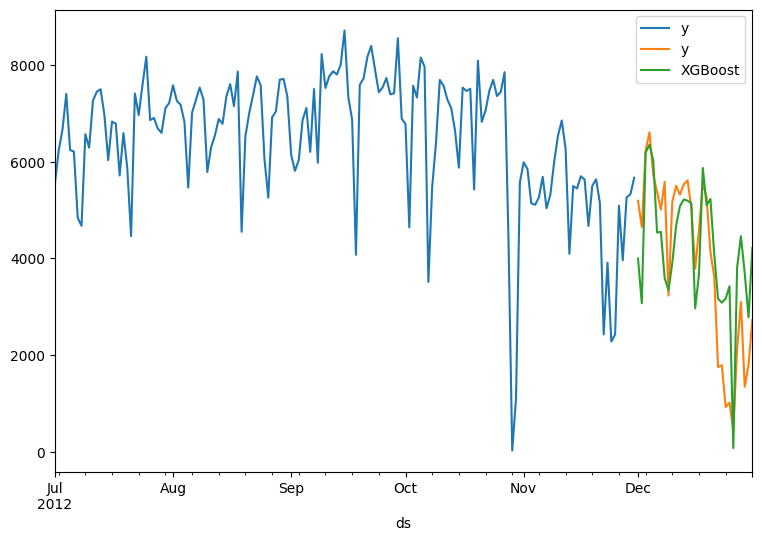

In [99]:
#Viz
training_set.y['2012-07-01':].plot(figsize = (9,6), legend = True)
test_set.y.plot(legend = True)
predictions_xgb.plot(legend = True)

In [100]:
#MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(test_set['y'], predictions_xgb),0))
print(round(np.sqrt(mean_squared_error(test_set['y'], predictions_xgb)), 0))

946.0
1174.0


In [101]:
#MAPE function
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(test_set['y'], predictions_xgb)

45.377004733275925

In [103]:
#predictions_xgb.to_csv('predictions_xgb.csv', index = True)